# Exploratory Data Analysis

## Most Common Word

In [15]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,pahlawan_trip,pak_man,trowulan,damas,gun,cak_man,samut,presiden
abal,0,0,1,0,0,0,0,0
abis,0,0,1,1,0,0,0,0
abm,0,0,2,0,0,0,0,0
ac,0,0,0,1,0,0,0,0
ada,3,2,3,2,2,2,3,2


In [16]:
# Find the top 30 words said by each place
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'pahlawan_trip': [('bakso', 37),
  ('malang', 12),
  ('kurang', 9),
  ('enak', 8),
  ('menu', 7),
  ('rasanya', 7),
  ('pedas', 6),
  ('mie', 6),
  ('satu', 6),
  ('kalo', 5),
  ('makan', 5),
  ('makanan', 5),
  ('lumayan', 5),
  ('harga', 5),
  ('tempatnya', 5),
  ('trip', 4),
  ('luas', 4),
  ('ayam', 4),
  ('bakarnya', 4),
  ('salah', 4),
  ('pahlawan', 4),
  ('khas', 4),
  ('lebih', 4),
  ('menikmati', 4),
  ('disini', 4),
  ('ada', 3),
  ('cukup', 3),
  ('lengkap', 3),
  ('terlalu', 3),
  ('disajikan', 3)],
 'pak_man': [('bakso', 54),
  ('makan', 14),
  ('malang', 10),
  ('enak', 9),
  ('bakarnya', 9),
  ('rasa', 9),
  ('baksonya', 8),
  ('biasa', 8),
  ('rasanya', 8),
  ('pedas', 7),
  ('disini', 7),
  ('sendiri', 6),
  ('kuah', 5),
  ('harga', 4),
  ('tempatnya', 4),
  ('cukup', 4),
  ('pertama', 4),
  ('wah', 4),
  ('butir', 4),
  ('mie', 4),
  ('bgt', 4),
  ('mantap', 4),
  ('kali', 4),
  ('ambil', 3),
  ('gak', 3),
  ('dagingnya', 3),
  ('bisa', 3),
  ('pokoknya', 3),
  ('be

In [17]:
# Print the top 15 words said by each place
for place, top_words in top_dict.items():
    print(place)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

pahlawan_trip
bakso, malang, kurang, enak, menu, rasanya, pedas, mie, satu, kalo, makan, makanan, lumayan, harga
---
pak_man
bakso, makan, malang, enak, bakarnya, rasa, baksonya, biasa, rasanya, pedas, disini, sendiri, kuah, harga
---
trowulan
bakso, enak, pedas, makan, kuah, banget, bakarnya, paling, bumbu, rasa, biasa, pas, panas, disini
---
damas
bakso, enak, malang, baksonya, makan, panas, banget, tempatnya, harga, mampir, rasa, variasi, kuahnya, sendiri
---
gun
bakso, enak, malang, makan, kuahnya, biasa, rasanya, tahu, sayur, kuah, luar, urat, sendiri, terkenal
---
cak_man
bakso, malang, makan, enak, satu, salah, pegawai, besar, krim, harga, es, bilang, mau, aneka
---
samut
bakso, malang, gorengan, tahu, siomay, rasanya, goreng, kuahnya, varian, cukup, makan, baru, halus, jenis
---
presiden
bakso, kereta, rel, makan, malang, api, antri, biasa, pinggir, rasa, rasanya, kalau, president, datang
---


In [18]:

# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each place
words = []
for place in data.columns:
    top = [word for (word, count) in top_dict[place]]
    for t in top:
        words.append(t)
        
words

['bakso',
 'malang',
 'kurang',
 'enak',
 'menu',
 'rasanya',
 'pedas',
 'mie',
 'satu',
 'kalo',
 'makan',
 'makanan',
 'lumayan',
 'harga',
 'tempatnya',
 'trip',
 'luas',
 'ayam',
 'bakarnya',
 'salah',
 'pahlawan',
 'khas',
 'lebih',
 'menikmati',
 'disini',
 'ada',
 'cukup',
 'lengkap',
 'terlalu',
 'disajikan',
 'bakso',
 'makan',
 'malang',
 'enak',
 'bakarnya',
 'rasa',
 'baksonya',
 'biasa',
 'rasanya',
 'pedas',
 'disini',
 'sendiri',
 'kuah',
 'harga',
 'tempatnya',
 'cukup',
 'pertama',
 'wah',
 'butir',
 'mie',
 'bgt',
 'mantap',
 'kali',
 'ambil',
 'gak',
 'dagingnya',
 'bisa',
 'pokoknya',
 'besar',
 'rumah',
 'bakso',
 'enak',
 'pedas',
 'makan',
 'kuah',
 'banget',
 'bakarnya',
 'paling',
 'bumbu',
 'rasa',
 'biasa',
 'pas',
 'panas',
 'disini',
 'mie',
 'bumbunya',
 'rasanya',
 'malang',
 'langsung',
 'memang',
 'dibakar',
 'lokasi',
 'ada',
 'lebih',
 'manis',
 'kurang',
 'ramah',
 'harga',
 'dekat',
 'ambil',
 'bakso',
 'enak',
 'malang',
 'baksonya',
 'makan',
 'pa

In [19]:
Counter(words).most_common()

[('bakso', 8),
 ('malang', 8),
 ('makan', 8),
 ('enak', 7),
 ('rasanya', 7),
 ('harga', 6),
 ('cukup', 6),
 ('rasa', 6),
 ('mie', 4),
 ('satu', 4),
 ('bakarnya', 4),
 ('salah', 4),
 ('disini', 4),
 ('baksonya', 4),
 ('biasa', 4),
 ('sendiri', 4),
 ('tahu', 4),
 ('kurang', 3),
 ('pedas', 3),
 ('makanan', 3),
 ('tempatnya', 3),
 ('ada', 3),
 ('kuah', 3),
 ('ambil', 3),
 ('besar', 3),
 ('banget', 3),
 ('kuahnya', 3),
 ('kalau', 3),
 ('goreng', 3),
 ('gorengan', 3),
 ('khas', 2),
 ('lebih', 2),
 ('lengkap', 2),
 ('mantap', 2),
 ('kali', 2),
 ('bisa', 2),
 ('rumah', 2),
 ('panas', 2),
 ('pesan', 2),
 ('menu', 1),
 ('kalo', 1),
 ('lumayan', 1),
 ('trip', 1),
 ('luas', 1),
 ('ayam', 1),
 ('pahlawan', 1),
 ('menikmati', 1),
 ('terlalu', 1),
 ('disajikan', 1),
 ('pertama', 1),
 ('wah', 1),
 ('butir', 1),
 ('bgt', 1),
 ('gak', 1),
 ('dagingnya', 1),
 ('pokoknya', 1),
 ('paling', 1),
 ('bumbu', 1),
 ('pas', 1),
 ('bumbunya', 1),
 ('langsung', 1),
 ('memang', 1),
 ('dibakar', 1),
 ('lokasi', 1),
 

In [20]:
# If more than half of the places have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['bakso', 'malang', 'makan', 'enak', 'rasanya']

## Recreate Document-term matrix excluding common top word

In [21]:
# create new document-term matrix excluding common top word
from Sastrawi.Dictionary.ArrayDictionary import ArrayDictionary
from sklearn.feature_extraction.text import CountVectorizer

def additionalStopWord(text):
    # additional stopwords
    dictionary = ArrayDictionary(add_stop_words)
    words = text.split(' ')
    stopped_words = [word for word in words if not dictionary.contains(word)]
    
    return ' '.join(stopped_words)

data_clean = pd.read_pickle('clean_data.pkl')
indonesian_reviews = []
for review in data_clean:
    indonesian_reviews.append(additionalStopWord(review))

# The places
places = ["pahlawan_trip","pak_man","trowulan","damas","gun","cak_man","samut","presiden"]

cv = CountVectorizer()
data_cv = cv.fit_transform(indonesian_reviews)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

data_dtm.index = places
data_dtm

,abal,abis,abm,ac,ada,adalah,adany,adanya,aduhai,agak,...,wisatawan,wlwpn,worth,wow,yaa,yach,yah,yamin,yin,yummy
pahlawan_trip,0,0,0,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
pak_man,0,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
trowulan,1,1,2,0,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
damas,0,1,0,1,2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
gun,0,0,0,0,2,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
cak_man,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
samut,0,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
presiden,0,0,0,0,2,0,0,0,1,1,...,0,0,0,1,1,1,0,0,0,0


In [22]:
# pickle new dtm
data_dtm.to_pickle("dtm.pkl")

## Word Cloud

In [23]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=add_stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

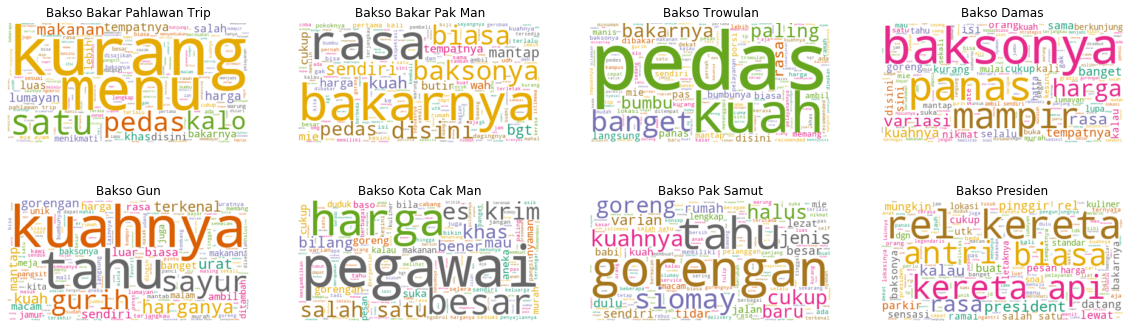

In [24]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 6]

full_names = ["Bakso Bakar Pahlawan Trip","Bakso Bakar Pak Man","Bakso Trowulan","Bakso Damas","Bakso Gun","Bakso Kota Cak Man","Bakso Pak Samut","Bakso Presiden"]

# Create subplots for each comedian
for index, places in enumerate(data.columns):
    wc.generate(data_clean[index])
    
    plt.subplot(2, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings
1. Dari 3 warung bakso bakar, bakso pak man paling sering di mention tentang bakso bakar
2. Kata yang mewakili Bakso Trowulan adalah pedas
3. Bakso Gun terkenal dengan 'kuah' dan 'tahunya'
4. Bakso Cak Man banyak dimention tentang 'pegawai' dan 'harga'
5. Bakso Pak Samut banyak dimention tentang 'gorengan'
6. Bakso Presiden jarang dibicarakan tentang produknya, tetapi tempatnya yang bersebelahan dengan rel kereta api

### Further Analysis
1. Bakso dengan kuah terenak
2. Bakso yang paling pedas
3. Bakso yang punya gorengan terenak
4. Bakso dengan tahu terenak
5. Bakso yang sering dimention tentang harga

In [31]:
# bakso dengan kuah terenak
data_dtm

,abal,abis,abm,ac,ada,adalah,adany,adanya,aduhai,agak,...,wisatawan,wlwpn,worth,wow,yaa,yach,yah,yamin,yin,yummy
pahlawan_trip,0,0,0,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
pak_man,0,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
trowulan,1,1,2,0,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
damas,0,1,0,1,2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
gun,0,0,0,0,2,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
cak_man,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
samut,0,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
presiden,0,0,0,0,2,0,0,0,1,1,...,0,0,0,1,1,1,0,0,0,0
